In [124]:
# -- imports
%matplotlib inline
import numpy as np
import os
import pandas as pd
from config import *
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib as mpl

In [2]:
ffpath = os.path.join(configs["dpath"], "autoscan_features.3.feather") #this .feather file contain only the ID and OBJECT_TYPE for the images that I have on my computer
new_labels = pd.read_feather(ffpath)

# dropping ALL duplicte values 
#new_labels.drop_duplicates(inplace=True) 
new_labels = new_labels.sort_values(by=['ID'])
new_labels = new_labels.reset_index(drop = True)
  
# displaying data 
new_labels

,ID,OBJECT_TYPE,AMP,A_IMAGE,A_REF,BAND,B_IMAGE,B_REF,CCDID,COLMEDS,...,N3SIG3,N3SIG3SHIFT,N3SIG5,N3SIG5SHIFT,NN_DIST_RENORM,NUMNEGRN,SCALE,SNR,SPREADERR_MODEL,SPREAD_MODEL
0,75605,1,0.917655,1.242,3.060010,g,0.944,2.439935,21,0.120526,...,0,-9,0,-9,0.235493,24,1.381313,6.526832,0.005189,-0.009116
1,75898,1,0.179013,0.935,2.576239,g,0.922,1.820171,18,0.032853,...,0,-12,0,-14,0.257563,23,1.692956,5.573217,0.006101,-0.004171
2,76051,1,0.013268,1.528,3.647787,g,1.233,3.159317,57,0.267664,...,0,-10,0,-20,0.941432,5,0.260088,13.978503,0.002139,-0.003000
3,76229,1,0.569777,0.834,5.210605,g,0.685,5.056543,5,0.072407,...,0,-22,0,-46,0.219160,14,1.852880,5.592828,0.006952,-0.000032
4,76392,1,0.524820,1.094,1.924387,g,0.525,1.850099,45,0.085889,...,0,-14,0,-16,0.333854,25,1.650108,4.965725,0.007083,-0.010008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898958,11874751,0,0.975729,1.520,1.802727,z,1.252,1.150422,10,0.110625,...,0,6,0,6,0.275255,14,1.969859,9.565697,0.003626,0.010192
898959,11874758,0,0.776830,0.750,2.405035,z,0.676,1.279556,10,0.128664,...,0,1,0,1,1.101463,15,1.244608,5.641251,0.006096,-0.008210
898960,11874762,0,0.455947,0.802,5.320844,z,0.500,2.230924,10,0.095031,...,0,-10,0,-14,0.938816,24,1.674698,4.633825,0.007645,0.001634
898961,11874772,0,0.764371,1.494,2.043744,z,1.267,1.958380,10,0.075626,...,0,0,0,0,0.734137,22,1.793416,11.305648,0.003113,0.003695


In [3]:
#Create path for diff, srch, temp images
pttype = '*'

srch1 = os.path.join(configs["dpath"],'Stamps1','20130829', '*',pttype + '*.fits') #general path of the images 
srch2 = os.path.join(configs["dpath"],'Stamps1','20130831', '*',pttype + '*.fits')
srch3 = os.path.join(configs["dpath"],'Stamps1','20130901', '*',pttype + '*.fits')
flist1  = np.array(sorted(glob.glob(srch1))) #recorre el path por *, recorre temp, srch y diff y el *.fits por el numero de la imagen
flist2  = np.array(sorted(glob.glob(srch2)))
flist3  = np.array(sorted(glob.glob(srch3)))
flist = np.concatenate((flist1,flist2,flist3))

In [4]:
flist1

array(['/Users/tatianaacerocuellar/Documents/Delaware/Data/Stamps1/20130829/470430504/diff6962491.fits',
       '/Users/tatianaacerocuellar/Documents/Delaware/Data/Stamps1/20130829/470430504/srch6962491.fits',
       '/Users/tatianaacerocuellar/Documents/Delaware/Data/Stamps1/20130829/470430504/temp6962491.fits',
       ...,
       '/Users/tatianaacerocuellar/Documents/Delaware/Data/Stamps1/20130829/470928122/diff7052305.fits',
       '/Users/tatianaacerocuellar/Documents/Delaware/Data/Stamps1/20130829/470928122/srch7052305.fits',
       '/Users/tatianaacerocuellar/Documents/Delaware/Data/Stamps1/20130829/470928122/temp7052305.fits'],
      dtype='<U94')

In [5]:
ID =[int(f.split('/')[-1][4:-5]) for f in flist]

In [6]:
len(ID)

8061

In [7]:
#extract from .feather file the ID that are on flist
current_labels = new_labels[new_labels["ID"].isin(ID)]
current_labels = current_labels[["ID", "OBJECT_TYPE"]]
current_labels = current_labels.sort_values(by= ["ID"]).reset_index(drop=True)
current_labels

,ID,OBJECT_TYPE
0,6960252,1
1,6961062,1
2,6961064,1
3,6961300,1
4,6961308,0
...,...,...
2682,7778614,0
2683,7778883,1
2684,7779002,1
2685,7779022,1


In [8]:
#counts for 0 type and 1 type
counts_type = np.unique(current_labels['OBJECT_TYPE'], return_counts=True)
print("0 = {} and 1 = {}".format(counts_type[1][0], counts_type[1][1]))

0 = 790 and 1 = 1897


In [9]:
imlist_dict = {}

# stores the name of the images as a list for ID above
#is a circle because i extract the ID for the flist, buttt
imlist_dict['flist'] = [f for f in flist if int(f.split('/')[-1][4:-5]) in current_labels["ID"].to_numpy()]
print (len(imlist_dict['flist']))

#N = imlist_dict["nimgs"] = int(imlist_dict["fnumbers"].shape[0]) 
imlist_dict["imshp"] = fits.open((imlist_dict["flist"][0]))[0].data.shape #shape row,col
extension="fits"
imdtype = {"fits":float, "gif":np.uint8, }

8061


In [10]:
#sort as: descending ID and diff, srch, temp
imlist_dict["flist"] = sorted(imlist_dict["flist"], key=lambda s: s.split('/')[-1][:4])
imlist_dict["flist"]= sorted(imlist_dict["flist"], key=lambda s: s.split('/')[-1][4:])

In [11]:
imlist_dict["flist"][2328*3+1]

'/Users/tatianaacerocuellar/Documents/Delaware/Data/Stamps1/20130831/470979024/srch7472382.fits'

In [11]:
#container for data train and data test
data_full = np.zeros((len(imlist_dict["flist"]),imlist_dict["imshp"][0], imlist_dict["imshp"][1]),imdtype[extension])

#fill the container and open images
for i in range(len(imlist_dict["flist"])):
    data_full[i] = fits.open(''.join(imlist_dict["flist"][i]))[0].data

In [12]:
data_norm = data_full.astype(float)

In [13]:
# --normalize
# mean and std for diff images
# min and max for srch and temp

data_norm[::3] = (data_norm[::3]- data_norm[::3].mean(axis=(1,2), keepdims=True))/data_norm[::3].std(axis=(1,2), keepdims=True) #diff
    
data_norm[1::3]= (data_norm[1::3]-data_norm[1::3].min(axis=(1,2), keepdims=True))/data_norm[1::3].max(axis=(1,2), keepdims=True) #srch
data_norm[2::3]= (data_norm[2::3]-data_norm[2::3].min(axis=(1,2), keepdims=True))/data_norm[2::3].max(axis=(1,2), keepdims=True) #temp

In [14]:
data_norm.shape

(8061, 51, 51)

In [15]:
#concatenate diff srch temp for the same ID

final_data = np.zeros((int(len(data_full)//3),imlist_dict["imshp"][0], imlist_dict["imshp"][1]*3))
final_data = np.concatenate((data_norm[::3],data_norm[1::3],data_norm[2::3]), axis = 2)

In [16]:
#exxtract the objects  = 0
df_ID_0 = current_labels[current_labels["OBJECT_TYPE"]==0]
#exxtract the objects  = 1
df_ID_1 = current_labels[current_labels["OBJECT_TYPE"]==1]

In [17]:
len_each_set = min(len(df_ID_0), len(df_ID_1))
#extract random the number of data classify as 0
index_data_ID0 = df_ID_0.sample(len_each_set-10, random_state = 2).sort_index()
#extract random the number of data classify as 1
index_data_ID1 = df_ID_1.sample(len_each_set+10,random_state = 2).sort_index()

In [18]:
#convert index to numpy to iterate
index_ID0 = index_data_ID0.index.to_numpy()
index_ID1 = index_data_ID1.index.to_numpy()

In [19]:
#concatenate both index
indexes = sorted(np.concatenate((index_ID0, index_ID1)))
max(indexes)

2686

In [20]:
#extract the data from the index given above, of the complete data, where 0 and 1 are not equal
equal_type_data = np.array([final_data[i] for i in indexes])
equal_type_data.shape[0]

1580

In [21]:
#70% is for training
#30% testing
train_len = int(equal_type_data.shape[0]*0.7)
test_len = equal_type_data.shape[0]  - int(equal_type_data.shape[0]*0.7)

In [22]:
import random
random.seed(4)
random_index = random.sample(range(0, equal_type_data.shape[0]), train_len)
min(random_index)

0

In [23]:
#70% is for training
#30% testing
train = np.array([final_data[i] for i in [indexes[i] for i in sorted(random_index)]])
test = np.array([final_data[i] for i in indexes if i not in [indexes[i] for i in sorted(random_index)]])

In [24]:
len(train),len(test)

(1106, 474)

In [25]:
#extracting the label 0 or 1
targets = [current_labels.iloc[i]["OBJECT_TYPE"] for i in indexes]

In [26]:
#split the targets
train_targ = np.array([current_labels.iloc[i]["OBJECT_TYPE"] for i in [indexes[i] for i in sorted(random_index)]])
test_targ = np.array([current_labels.iloc[i]["OBJECT_TYPE"] for i in indexes if i not in [indexes[i] for i in sorted(random_index)]])

In [27]:
#extract the ID0
ID0 = index_data_ID0["ID"].to_numpy()
#extract the ID1
ID1 = index_data_ID1["ID"].to_numpy()

In [28]:
#concatenate the ID that are going to be used here
IDs = sorted(np.concatenate((ID0, ID1)))

In [30]:
np.random.seed(1)
tf.random.set_seed(346)

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [31]:
# evaluate loaded model on test data
opt = keras.optimizers.SGD(learning_rate=0.01)
loaded_model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

feat_tr2 = train.reshape(len(train), 51, 153, 1)
feat_te2 = test.reshape(len(test), 51, 153, 1)


# -- print the accuracy
loss_tr, acc_tr = loaded_model.evaluate(feat_tr2, train_targ)
loss_te, acc_te = loaded_model.evaluate(feat_te2, test_targ)

print("Training accuracy : {0:.4f}".format(acc_tr))
print("Testing accuracy  : {0:.4f}".format(acc_te))


1106/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

474/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training accuracy : 0.9892
Testing accuracy  : 0.9726


In [32]:
y_pred_test = loaded_model.predict(feat_te2)

In [33]:
np.argmax(y_pred_test,axis=1).shape

(474,)

In [34]:
y_pred_train = loaded_model.predict(feat_tr2)

In [35]:
np.argmax(y_pred_train,axis=1)

array([1, 1, 0, ..., 1, 1, 0])

In [36]:
current_labels

,ID,OBJECT_TYPE
0,6960252,1
1,6961062,1
2,6961064,1
3,6961300,1
4,6961308,0
...,...,...
2682,7778614,0
2683,7778883,1
2684,7779002,1
2685,7779022,1


In [37]:
train_df = current_labels.iloc[[i for i in [indexes[i] for i in sorted(random_index)]]]
train_dfs = train_df.copy()
train_dfs["predicted"] = np.argmax(y_pred_train,axis=1)
train_dfs

,ID,OBJECT_TYPE,predicted
2,6961064,1,1
3,6961300,1,1
4,6961308,0,0
5,6961332,1,1
7,6961351,0,0
...,...,...,...
2680,7778287,1,1
2683,7778883,1,1
2684,7779002,1,1
2685,7779022,1,1


In [38]:
train_dfs[train_dfs["OBJECT_TYPE"]==1]

,ID,OBJECT_TYPE,predicted
2,6961064,1,1
3,6961300,1,1
5,6961332,1,1
10,6961933,1,1
28,6962438,1,1
...,...,...,...
2675,7778193,1,1
2680,7778287,1,1
2683,7778883,1,1
2684,7779002,1,1


In [39]:
test_df = current_labels.iloc[[i for i in indexes if i not in [indexes[i] for i in sorted(random_index)]]]
test_dfs = test_df.copy()
test_dfs["predicted"] = np.argmax(y_pred_test,axis=1)
test_dfs

,ID,OBJECT_TYPE,predicted
13,6961954,0,0
22,6962158,1,1
23,6962225,1,1
26,6962414,1,1
27,6962426,0,0
...,...,...,...
2660,7777289,1,1
2666,7777707,0,0
2668,7778023,1,1
2670,7778057,0,0


In [40]:
test_dfs[test_dfs["OBJECT_TYPE"]==1]

,ID,OBJECT_TYPE,predicted
22,6962158,1,1
23,6962225,1,1
26,6962414,1,1
47,6962862,1,1
56,6963008,1,1
...,...,...,...
2616,7775869,1,1
2618,7775938,1,1
2620,7775949,1,1
2660,7777289,1,1


In [31]:
#total
label1 = current_labels[current_labels["OBJECT_TYPE"] == 1]
label1

,ID,OBJECT_TYPE
0,6960252,1
1,6961062,1
2,6961064,1
3,6961300,1
5,6961332,1
...,...,...
2680,7778287,1
2681,7778592,1
2683,7778883,1
2684,7779002,1


In [42]:
#the ones that are not in train or test
ID_1_notestnotrain = label1[label1["ID"].isin([i for i in label1["ID"].to_numpy() if i not in np.array(IDs)])]
ID_1_notestnotrain

,ID,OBJECT_TYPE
0,6960252,1
1,6961062,1
6,6961349,1
8,6961399,1
11,6961937,1
...,...,...
2674,7778161,1
2676,7778201,1
2677,7778206,1
2679,7778236,1


In [43]:
notestnotrain = np.array([final_data[i] for i in ID_1_notestnotrain.index.to_numpy()])
len(notestnotrain ), notestnotrain.shape

(1097, (1097, 51, 153))

In [44]:
#evaluate on new data
feat_notestnotrain = notestnotrain.reshape(len(notestnotrain), 51, 153, 1)

# -- print the accuracy
loss_notestnotrain, acc_notestnotrain = loaded_model.evaluate(feat_notestnotrain, np.ones(notestnotrain.shape[0]))

print("notestnotrain accuracy : {0:.4f}".format(acc_notestnotrain))

1097/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

notestnotrain accuracy : 0.9353


In [45]:
y_pred_notestnotrain = loaded_model.predict(feat_notestnotrain)
np.argmax(y_pred_notestnotrain,axis=1).shape

(1097,)

In [46]:
ID_1_notestnotrains = ID_1_notestnotrain.copy()
ID_1_notestnotrains["predicted"] = np.argmax(y_pred_notestnotrain,axis=1)
ID_1_notestnotrains

,ID,OBJECT_TYPE,predicted
0,6960252,1,1
1,6961062,1,1
6,6961349,1,1
8,6961399,1,1
11,6961937,1,1
...,...,...,...
2674,7778161,1,1
2676,7778201,1,1
2677,7778206,1,1
2679,7778236,1,0


In [47]:
total_boglc = pd.concat([ID_1_notestnotrains, test_dfs[test_dfs["OBJECT_TYPE"]==1], train_dfs[train_dfs["OBJECT_TYPE"]==1]])
total_boglc

,ID,OBJECT_TYPE,predicted
0,6960252,1,1
1,6961062,1,1
6,6961349,1,1
8,6961399,1,1
11,6961937,1,1
...,...,...,...
2675,7778193,1,1
2680,7778287,1,1
2683,7778883,1,1
2684,7779002,1,1


In [48]:
total_boglc[total_boglc["predicted"] == 0]


,ID,OBJECT_TYPE,predicted
40,6962770,1,0
49,6962871,1,0
118,6964801,1,0
142,6965591,1,0
234,6969207,1,0
...,...,...,...
2351,7538657,1,0
2352,7590262,1,0
2356,7674523,1,0
2360,7674762,1,0


In [29]:
kmean_TLgroup = [6971509,6997740,6998100,6998884,7000324,7007110,7008824,7013456,7016443,7021066,7023795,7025605,
 7028624,7033688,7034048,7034414,7043984,7045292,7046024,7048281,7056052,7227364,7227575,7238000,7472382,7695348,
 7772671,
 7036262,7045445,7048079,7052131,7052223,7239672,7292366,7694527,7778236]

In [50]:
objec_kmenas = total_boglc[total_boglc["ID"].isin(kmean_TLgroup)]
objec_kmenas

,ID,OBJECT_TYPE,predicted
275,6971509,1,0
348,6997740,1,1
649,7007110,1,1
811,7013456,1,1
890,7016443,1,1
1012,7021066,1,0
1222,7033688,1,0
1300,7036262,1,1
1514,7043984,1,1
1548,7045292,1,1


In [58]:
len(objec_kmenas)

36

In [51]:
objec_kmenas[objec_kmenas["predicted"] == 0]

,ID,OBJECT_TYPE,predicted
275,6971509,1,0
1012,7021066,1,0
1222,7033688,1,0
2328,7472382,1,0
2679,7778236,1,0
2222,7239672,1,0


In [52]:
isolated_bogus_kmenas = objec_kmenas[objec_kmenas["predicted"] == 0].index.to_numpy()
isolated_bogus_kmenas 

array([ 275, 1012, 1222, 2328, 2679, 2222])

In [53]:
isolated_bogus_kmenas[0]

275

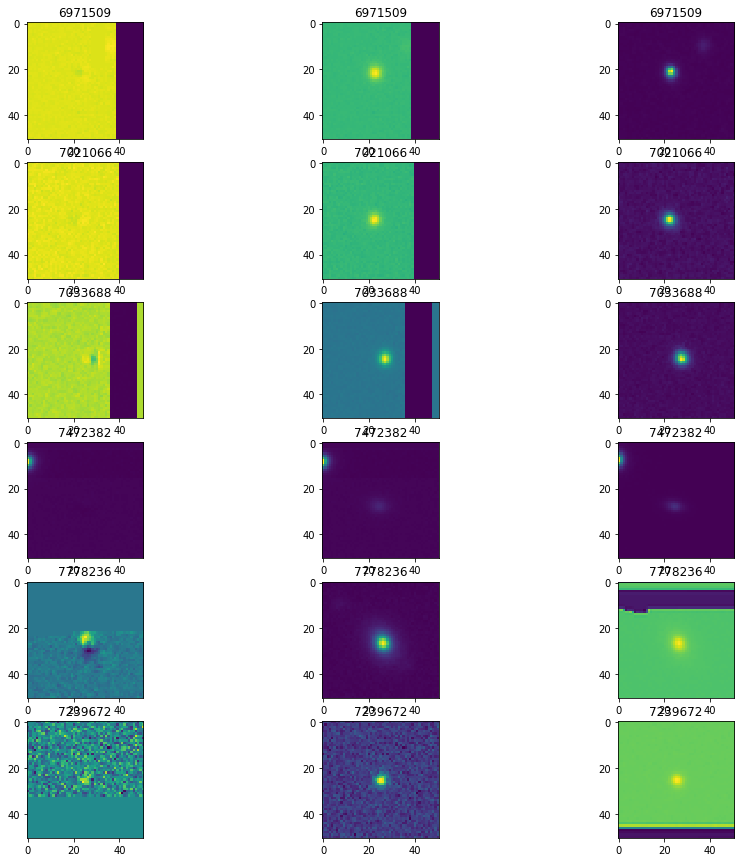

In [54]:
fig, ax = plt.subplots(6,3, figsize = (15,15))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
k = 0
for i in range(3):
    ax[0,i].imshow(data_full[(isolated_bogus_kmenas[0]*3) + k])
    ax[0,i].set_title("{}".format(objec_kmenas[objec_kmenas["predicted"] == 0]["ID"].to_numpy()[0]))
    ax[1, i].imshow(data_full[(isolated_bogus_kmenas[1]*3) + k])
    ax[1,i].set_title("{}".format(objec_kmenas[objec_kmenas["predicted"] == 0]["ID"].to_numpy()[1]))
    ax[2, i].imshow(data_full[(isolated_bogus_kmenas[2]*3) + k])
    ax[2,i].set_title("{}".format(objec_kmenas[objec_kmenas["predicted"] == 0]["ID"].to_numpy()[2]))
    ax[3, i].imshow(data_full[(isolated_bogus_kmenas[3]*3) + k])
    ax[3,i].set_title("{}".format(objec_kmenas[objec_kmenas["predicted"] == 0]["ID"].to_numpy()[3]))
    ax[4, i].imshow(data_full[(isolated_bogus_kmenas[4]*3) + k])
    ax[4,i].set_title("{}".format(objec_kmenas[objec_kmenas["predicted"] == 0]["ID"].to_numpy()[4]))
    ax[5, i].imshow(data_full[(isolated_bogus_kmenas[5]*3) + k])
    ax[5,i].set_title("{}".format(objec_kmenas[objec_kmenas["predicted"] == 0]["ID"].to_numpy()[5]))
    k = k+1

In [52]:
# fig, ax = plt.subplots(9,3, figsize= (15,9))
# l = 0
# for i in range(9):
#     k = 0
#     for j in range(3):
#         if k < 3:
#             ax[i,j].imshow(data_full[isolated_bogus_kmenas[l]]+k)
#             #ax[i,j].set_title("{}".format(total_boglc[total_boglc["ID"].isin(kmean_TLgroup)].iloc[l]["ID"]))
#             k = k+1
#     l = l+1

In [55]:
total_boglc[total_boglc["ID"].isin(kmean_TLgroup)].iloc[2]["ID"]

7007110

In [56]:
total_boglc[total_boglc["ID"].isin(kmean_TLgroup)].index.to_numpy()[2]

649

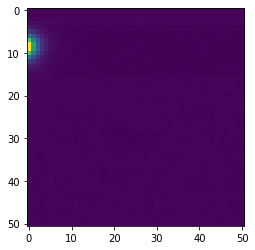

In [57]:
plt.imshow(data_norm[(2328*3) + 0])

In [56]:
current_labels[current_labels["ID"] == 7472382]

,ID,OBJECT_TYPE
2328,7472382,1


In [35]:
isolated_predicted_real = [6971509,7021066,7033688,7472382,7778236,7239672]

In [59]:
objec_kmenas = label1[label1["ID"].isin(kmean_TLgroup)]
objec_kmenas = objec_kmenas[~objec_kmenas["ID"].isin(isolated_predicted_real)]
objec_kmenas

,ID,OBJECT_TYPE
348,6997740,1
359,6998100,1
385,6998884,1
436,7000324,1
649,7007110,1
690,7008824,1
811,7013456,1
890,7016443,1
1065,7023795,1
1087,7025605,1


In [48]:
objec_kmenas.index.to_numpy()

array([ 348,  359,  385,  436,  649,  690,  811,  890, 1065, 1087, 1123,
       1237, 1248, 1300, 1514, 1548, 1556, 1565, 1621, 1628, 1716, 1720,
       1806, 1927, 1933, 2186, 2285, 2456, 2483, 2534])

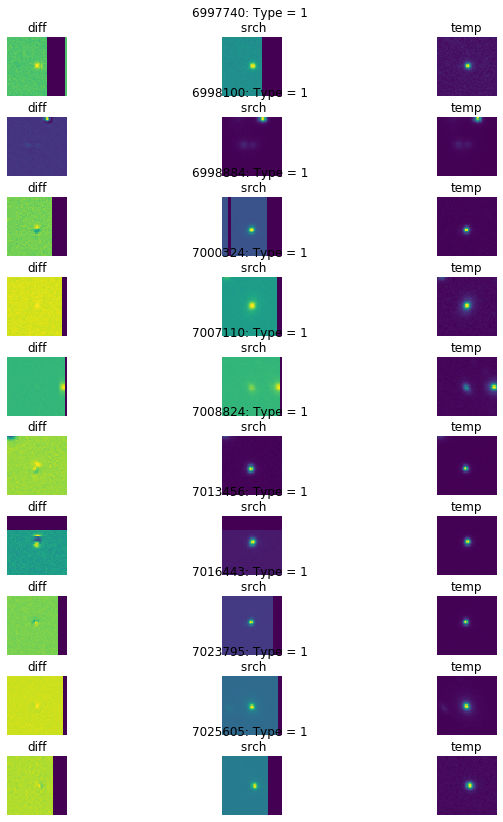

In [60]:
fig, ax = plt.subplots(10,3,figsize=(9,12))
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.4, 0.35)
l = 0
for i in range(10):
    k = 0
    for j in range(3):
        if k < 3:
            ax[i, j].axis("off")
            ax[i, j].imshow(data_full[(objec_kmenas.index.to_numpy()[l]*3) + k])
            ax[i, 1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][objec_kmenas.index.to_numpy()[l]*3].split("/")[-1][4:-5], objec_kmenas["OBJECT_TYPE"].to_numpy()[l]), fontsize = 12)
            ax[i, 0].set_title('diff', fontsize = 12)
            ax[i, 2].set_title('temp', fontsize = 12)
            k = k+1
    l = l+1

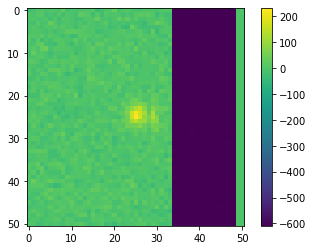

In [101]:
plt.imshow(data_full[348*3])
plt.colorbar()

In [82]:
plot_example_bogus_real = current_labels[current_labels["ID"].isin([7007110, 6997740,7691328,7690626,7691225])]
plot_example_bogus_real

,ID,OBJECT_TYPE
348,6997740,1
649,7007110,1
2366,7690626,0
2376,7691225,0
2381,7691328,1


In [ ]:
fig, ax = plt.subplots(10,3,figsize=(9,12))
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.4, 0.35)
l = 0
for i in range(10):
    k = 0
    for j in range(3):
        if k < 3:
            ax[i, j].axis("off")
            ax[i, j].imshow(data_full[(objec_kmenas.index.to_numpy()[l]*3) + k])
            ax[i, 1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][objec_kmenas.index.to_numpy()[l]*3].split("/")[-1][4:-5], objec_kmenas["OBJECT_TYPE"].to_numpy()[l]), fontsize = 12)
            ax[i, 0].set_title('diff', fontsize = 12)
            ax[i, 2].set_title('temp', fontsize = 12)
            k = k+1
    l = l+1

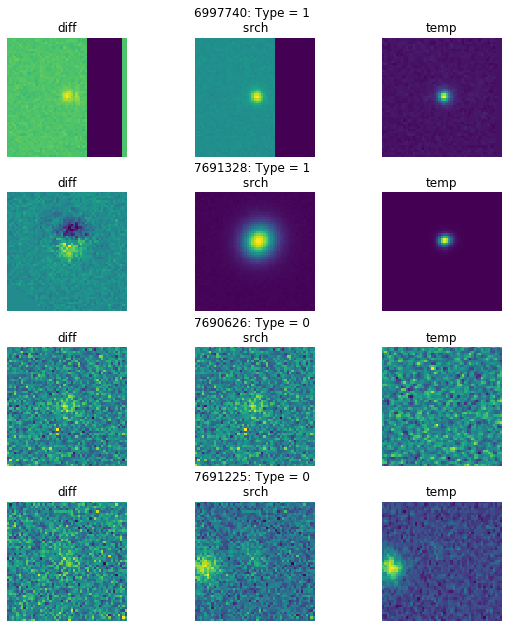

In [83]:
fig, ax = plt.subplots(4,3,figsize=(9,9))
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, -0.1, 0.3)
k = 0
for j in range(3):
    if k < 3:
        ax[0, j].axis("off")
        ax[0, j].imshow(data_full[(plot_example_bogus_real.index.to_numpy()[0]*3) + k])
        ax[0, 1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[0]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[0]), fontsize = 12)
        ax[0, 0].set_title('diff', fontsize = 12)
        ax[0, 2].set_title('temp', fontsize = 12)
        
        ax[1, j].axis("off")
        ax[1, j].imshow(data_full[(plot_example_bogus_real.index.to_numpy()[4]*3) + k])
        ax[1, 1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[4]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[4]), fontsize = 12)
        ax[1, 0].set_title('diff', fontsize = 12)
        ax[1, 2].set_title('temp', fontsize = 12)
        
        ax[2, j].axis("off")
        ax[2, j].imshow(data_full[(plot_example_bogus_real.index.to_numpy()[2]*3) + k])
        ax[2, 1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[2]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[2]), fontsize = 12)
        ax[2, 0].set_title('diff', fontsize = 12)
        ax[2, 2].set_title('temp', fontsize = 12)
        
        ax[3, j].axis("off")
        ax[3, j].imshow(data_full[(plot_example_bogus_real.index.to_numpy()[3]*3) + k])
        ax[3, 1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[3]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[3]), fontsize = 12)
        ax[3, 0].set_title('diff', fontsize = 12)
        ax[3, 2].set_title('temp', fontsize = 12)
        
        k = k+1

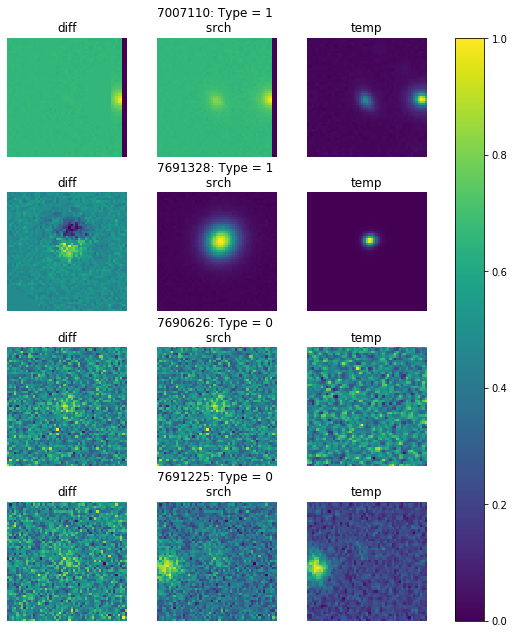

In [114]:
fig, ax = plt.subplots(4,3,figsize=(9,9))
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, -0.1, 0.3)
k = 0
for j in range(3):
    if k < 3:
        ax[0, j].axis("off")
        ax[0, j].imshow(data_norm[(plot_example_bogus_real.index.to_numpy()[1]*3) + k])
        ax[0, 1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[1]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[1]), fontsize = 12)
        ax[0, 0].set_title('diff', fontsize = 12)
        ax[0, 2].set_title('temp', fontsize = 12)
        
        ax[1, j].axis("off")
        im = ax[1, j].imshow(data_norm[(plot_example_bogus_real.index.to_numpy()[4]*3) + k])
        ax[1, 1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[4]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[4]), fontsize = 12)
        ax[1, 0].set_title('diff', fontsize = 12)
        ax[1, 2].set_title('temp', fontsize = 12)
        
        ax[2, j].axis("off")
        ax[2, j].imshow(data_norm[(plot_example_bogus_real.index.to_numpy()[2]*3) + k])
        ax[2, 1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[2]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[2]), fontsize = 12)
        ax[2, 0].set_title('diff', fontsize = 12)
        ax[2, 2].set_title('temp', fontsize = 12)
        
        ax[3, j].axis("off")
        ax[3, j].imshow(data_norm[(plot_example_bogus_real.index.to_numpy()[3]*3) + k])
        ax[3, 1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[3]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[3]), fontsize = 12)
        ax[3, 0].set_title('diff', fontsize = 12)
        ax[3, 2].set_title('temp', fontsize = 12)
        #ax[3, 2].colorbar()
        
        k = k+1
#norm= plt.colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())
#sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
#sm.set_array([])

fig.colorbar(im, ax=ax)

plt.savefig("nonorm_new.pdf")


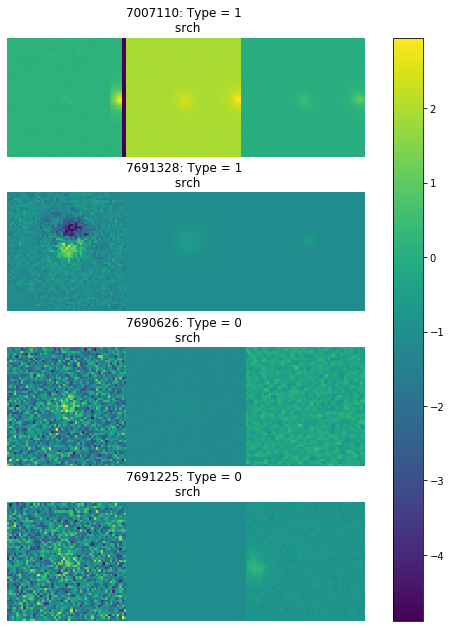

In [135]:
fig, ax = plt.subplots(4,1,figsize=(9,9))
fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, -0.1, 0.3)

# for i in range(4):
#     ax[i].axis("off")
#     ax[i].imshow(np.hstack(data_norm[i*3:i*3+3]))
#     ax[i].set_title('{}: Type = {}'.format(flist3[i*3].split("/")[-1][4:-5], types[i*3]), fontsize = 12)
    

ax[0].axis("off")
im = ax[0].imshow(np.hstack(data_norm[plot_example_bogus_real.index.to_numpy()[1]*3:plot_example_bogus_real.index.to_numpy()[1]*3+3]))
ax[0].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[1]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[1]), fontsize = 12)
ax[1].imshow(np.hstack(data_norm[plot_example_bogus_real.index.to_numpy()[4]*3:plot_example_bogus_real.index.to_numpy()[4]*3+3]))
ax[1].axis("off")
ax[1].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[4]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[4]), fontsize = 12)
ax[2].axis("off")
ax[2].imshow(np.hstack(data_norm[plot_example_bogus_real.index.to_numpy()[2]*3:plot_example_bogus_real.index.to_numpy()[2]*3+3]))
ax[2].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[2]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[2]), fontsize = 12)
ax[3].axis("off")
ax[3].imshow(np.hstack(data_norm[plot_example_bogus_real.index.to_numpy()[3]*3:plot_example_bogus_real.index.to_numpy()[3]*3+3]))
ax[3].set_title('{}: Type = {} \n srch'.format(imlist_dict["flist"][plot_example_bogus_real.index.to_numpy()[3]*3].split("/")[-1][4:-5], plot_example_bogus_real["OBJECT_TYPE"].to_numpy()[3]), fontsize = 12)


cbar = fig.colorbar(im, ax=ax)
plt.savefig("norm_new.pdf")


In [132]:
np.hstack(data_norm[plot_example_bogus_real.index.to_numpy()[4]*3:plot_example_bogus_real.index.to_numpy()[4]*3+3])

array([[ 3.99253632e-02, -5.23520002e-01, -1.00106406e-01, ...,
         1.38057586e-03,  1.63172032e-03,  1.40146863e-03],
       [ 9.45338945e-02, -5.17379819e-01,  2.50611556e-01, ...,
         1.53783457e-03,  1.71526581e-03,  1.62886942e-03],
       [ 6.17265526e-01, -3.46996017e-01, -1.18058137e+00, ...,
         1.17990413e-03,  9.11006259e-04,  8.62879507e-04],
       ...,
       [-6.53833595e-02, -6.53833595e-02, -6.53833595e-02, ...,
         1.53941677e-03,  2.13254296e-03,  1.19117386e-03],
       [-6.53833595e-02, -6.53833595e-02, -6.53833595e-02, ...,
         9.70250721e-04,  1.52108413e-03,  1.53629433e-03],
       [-6.53833595e-02, -6.53833595e-02, -6.53833595e-02, ...,
         1.14856575e-03,  5.95608981e-04,  8.58448642e-04]])